In [1]:
import math
from tqdm import tqdm
import datetime
from datetime import timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from functools import lru_cache
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (35,25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

def closest_value(input_list, input_value):
 
    arr = np.asarray(input_list)
 
    i = (np.abs(arr - input_value)).argmin()
 
    return arr[i], i

In [3]:
epochsInYear = 2880*365
LAM = math.log(2)/(6*epochsInYear)
EXP_LAM_SUB_ONE = ((math.e)**LAM)-1
SIMPLE_TOTAL = 330000000
BASELINE_TOTAL = 770000000
BASELINE_INITIAL_VALUE = 2888888880000000000
BASELINE_EXPONENT = ((math.e)**(math.log(2)/epochsInYear))
PB_MULTIPLIER=1024*1024*1024*1024*1024

SECTOR = 32*1024*1024*1024

#START_EPOCH = 2053894
#START_THETA = 1423894
#START_EPOCH_RB_POWER = 17274.2*PB_MULTIPLIER
#START_EPOCH_QAP = 18463*PB_MULTIPLIER
#START_EPOCH_CIRCULATION = 335204823

START_EPOCH = 1903090
def epoch_2_idx(epoch):
    if epoch < START_EPOCH:
        print("This epoch " + str(epoch) + " is too small!!")
        return 0
    return int(epoch - START_EPOCH)

START_EPOCH_RB_POWER = 16793.6*PB_MULTIPLIER
START_EPOCH_QAP = 17704.96*PB_MULTIPLIER
START_EPOCH_CIRCULATION = 310160000

START_EPOCH_EFFECTIVE_TIME = 1782511
START_THETA = 1782510.7077148725421923
START_EPOCH_CUM_REAL = 9810862042507329709495504
START_EPOCH_CUM_BASELINE = 9810864777723068410860243


ICO_2Y_RELEASE_PER_EPOCH = 7223364 / epochsInYear / 2
ICO_2Y_END_EPOCH = 2 * epochsInYear
ICO_3Y_RELEASE_PER_EPOCH = (87637883 + 898958) / epochsInYear / 3
ICO_3Y_END_EPOCH = 3 * epochsInYear
PL_RELEASE_PER_EPOCH = 400000000 / epochsInYear / 6
PL_END_EPOCH = 6 * epochsInYear #Didn't use in this simulation

def get_baseline_power(epoch):
    return BASELINE_INITIAL_VALUE * (BASELINE_EXPONENT**epoch)

def get_start_epoch_cumsum_baseline_power(start_epoch):
    start_epoch_cumsum_baseline_power = 0
    for epoch in range(1, start_epoch+1):
        start_epoch_cumsum_baseline_power += get_baseline_power(epoch)
    return start_epoch_cumsum_baseline_power

START_EPOCH_CUMSUM_BASELINE_POWER = get_start_epoch_cumsum_baseline_power(START_EPOCH)

def get_date_by_epoch(epoch):
    genesis_time = datetime.datetime(2020,8,25, 6, 0, 30)
    td = timedelta(seconds=(epoch-1)*30)
    return (genesis_time+td).date().isoformat()

def sigmoid(epoch, start_epoch):
    x = epoch-start_epoch
    return 2*(1-1/(1+expneg((1/365/2880)*x)))

In [4]:
get_date_by_epoch(1903090)

'2022-06-17'

In [5]:
## Assumptions we can modify
HIGH_SPEED_INC_EPOCH = 1943280 #Power increase was high before 7/1/2022
FIP36_EPOCH = HIGH_SPEED_INC_EPOCH + 8 * 31 * 2880 #assume start the FIP in about early of Nov
FIP36_POST_1M_EPOCH = FIP36_EPOCH + 1 * 30 *2880
FIP36_POST_6M_EPOCH = FIP36_EPOCH + 6 * 30 *2880
FIP36_POST_12M_EPOCH = FIP36_EPOCH + 12 * 30 *2880
FIP36_POST_36M_EPOCH = FIP36_EPOCH + 36 * 30 *2880

TURNING_POINTS = [HIGH_SPEED_INC_EPOCH, FIP36_EPOCH, FIP36_POST_1M_EPOCH, FIP36_POST_6M_EPOCH, FIP36_POST_12M_EPOCH, FIP36_POST_36M_EPOCH]


RB_POWER_INC_ASSUMPTIONS = [20*PB_MULTIPLIER/2880, 14*PB_MULTIPLIER/2880, 2*PB_MULTIPLIER/2880, 1*PB_MULTIPLIER/2880, 1*PB_MULTIPLIER/2880, 1*PB_MULTIPLIER/2880, 1*PB_MULTIPLIER/2880]
if len(TURNING_POINTS)+1 != len(RB_POWER_INC_ASSUMPTIONS):
    print("Assumptions for RB power increase doesn't match")

RB_POWER_EXP_ASSUMPTIONS = [10*PB_MULTIPLIER/2880, 10*PB_MULTIPLIER/2880, 40*PB_MULTIPLIER/2880, 30*PB_MULTIPLIER/2880, 15*PB_MULTIPLIER/2880, 5*PB_MULTIPLIER/2880, 2*PB_MULTIPLIER/2880]
if len(TURNING_POINTS)+1 != len(RB_POWER_EXP_ASSUMPTIONS):
    print("Assumptions for RB power expire doesn't match")
    
QAP_INC_ASSUMPTIONS = [RB_POWER_INC_ASSUMPTIONS[0]*1.1, 20*PB_MULTIPLIER/2880, 30*PB_MULTIPLIER/2880, 70*PB_MULTIPLIER/2880, 70*PB_MULTIPLIER/2880, 50*PB_MULTIPLIER/2880, 30*PB_MULTIPLIER/2880]
if len(TURNING_POINTS)+1 != len(QAP_INC_ASSUMPTIONS):
    print("Assumptions for qap increase doesn't match")
    
QAP_EXP_ASSUMPTIONS = [RB_POWER_EXP_ASSUMPTIONS[0], RB_POWER_EXP_ASSUMPTIONS[1]*1.1, RB_POWER_EXP_ASSUMPTIONS[2]*1.1, RB_POWER_EXP_ASSUMPTIONS[3]*1.2, RB_POWER_EXP_ASSUMPTIONS[4]*2, RB_POWER_EXP_ASSUMPTIONS[5]*5, RB_POWER_EXP_ASSUMPTIONS[6]*10]
#QAP_EXP_ASSUMPTIONS = [RB_POWER_EXP_ASSUMPTIONS[0], RB_POWER_EXP_ASSUMPTIONS[1]*1.1, RB_POWER_EXP_ASSUMPTIONS[2]*1.1, RB_POWER_EXP_ASSUMPTIONS[3]*1.2, RB_POWER_EXP_ASSUMPTIONS[4]*2, RB_POWER_EXP_ASSUMPTIONS[5]*2, RB_POWER_EXP_ASSUMPTIONS[6]*5]
if len(TURNING_POINTS)+1 != len(QAP_EXP_ASSUMPTIONS):
    print("Assumptions for qap expire doesn't match")
                       
def get_assumption(epoch, assumptions):
    turning_point_idx = 0
    for turning_point in TURNING_POINTS:
        if epoch < turning_point:
            return assumptions[turning_point_idx]
        turning_point_idx += 1
    if assumptions[-1] != assumptions[turning_point_idx]:
        print("SOMETHING IS WRONG WHNE YOU DEFINE YOUR ASSUMPTIONS")
    return assumptions[-1]
                       

#QAP_EXP_AFTER_FIP =  RB_POWER_EXP_AFTER_FIP * 1.1

BURN_PER_EPOCH = 18000/2880 #burn rate now is 15000 ~ 20000
SECTOR_LIFE = 365*2880

DEBUG = 0

CROSS_EPOCH_REACH = 0

In [6]:
get_assumption(FIP36_POST_12M_EPOCH-100, RB_POWER_EXP_ASSUMPTIONS)*2880/PB_MULTIPLIER

15.0

In [7]:
get_assumption(FIP36_POST_36M_EPOCH*2, RB_POWER_EXP_ASSUMPTIONS)*2880/PB_MULTIPLIER

2.0

In [8]:
current_epoch=START_EPOCH
current_theta=START_THETA
thetas = [START_THETA]

current_epoch_rb_power = START_EPOCH_RB_POWER
epoch_rb_powers = [current_epoch_rb_power]

current_epoch_qap = START_EPOCH_QAP
epoch_qaps = [current_epoch_qap]

epoch_circulations = [START_EPOCH_CIRCULATION]

eff_net_times = [START_EPOCH_EFFECTIVE_TIME]
cumsum_reals = [START_EPOCH_CUM_REAL]
cumsum_bases = [START_EPOCH_CUM_BASELINE]


In [9]:
def expneg(x):
    return (math.e)**(-1*x)

In [10]:
def get_qap_inc(epoch):
    return get_assumption(epoch, QAP_INC_ASSUMPTIONS)
    
def get_qap_exp(epoch):
    return get_assumption(epoch, QAP_EXP_ASSUMPTIONS)
    
def get_rb_inc(epoch):
    return get_assumption(epoch, RB_POWER_INC_ASSUMPTIONS)
    
def get_rb_exp(epoch):
    return get_assumption(epoch, RB_POWER_EXP_ASSUMPTIONS)
    
def get_qap_change(epoch):
    return get_qap_inc(epoch) - get_qap_exp(epoch)

def get_rb_change(epoch):
    return get_rb_inc(epoch) - get_rb_exp(epoch)

In [11]:
def get_rb_power(epoch):
    latest_epoch = len(epoch_rb_powers) + START_EPOCH - 1
    while latest_epoch < epoch:
        latest_epoch += 1
        latest_rb_power = epoch_rb_powers[-1]
        latest_rb_power = latest_rb_power + get_rb_change(latest_epoch)
        epoch_rb_powers.append(latest_rb_power)
    return epoch_rb_powers[epoch_2_idx(epoch)]

def get_qap(epoch):
    latest_epoch = len(epoch_qaps) + START_EPOCH - 1
    while latest_epoch < epoch:
        latest_epoch += 1
        latest_qap = epoch_qaps[-1]
        latest_qap = latest_qap + get_qap_change(latest_epoch)
        epoch_qaps.append(latest_qap)        
    return epoch_qaps[epoch_2_idx(epoch)]

In [12]:
def computeBaselineSupply(theta):
    theta_lam = LAM * theta
    eTL = expneg(theta_lam)
    oneSub = 1 - eTL
    return BASELINE_TOTAL * oneSub

def get_eff_net_time(epoch):
    update_buddle(epoch)
    return eff_net_times[epoch_2_idx(epoch)]

def get_cum_base(epoch):
    update_buddle(epoch)
    return cumsum_bases[epoch_2_idx(epoch)]

def get_cum_real(epoch):
    update_buddle(epoch)
    return cumsum_reals[epoch_2_idx(epoch)]

    
def update_buddle(epoch):
    global CROSS_EPOCH_REACH
    last_epoch = len(cumsum_reals) + START_EPOCH - 1
    while last_epoch < epoch:
        last_epoch += 1
        baseline_power = get_baseline_power(last_epoch)
        if (get_rb_power(last_epoch) < baseline_power) and (CROSS_EPOCH_REACH)==0:
            #print("Major event occur!! Baseline over take rb power now at epoch: "+str(last_epoch))
            #print("date is: ", get_date_by_epoch(last_epoch))
            #print("baseline_power: "+str(baseline_power/PB_MULTIPLIER))
            #print("raw bytes power: "+str(get_rb_power(last_epoch)/PB_MULTIPLIER))
            CROSS_EPOCH_REACH=1
        capped_real_power = min(get_rb_power(last_epoch), baseline_power)
        cumsum_real = cumsum_reals[-1] + capped_real_power
        cumsum_base = cumsum_bases[-1]
        eff_net_time = eff_net_times[-1]
        while cumsum_real > cumsum_base:
            eff_net_time += 1
            effective_baseline_power = get_baseline_power(eff_net_time)
            cumsum_base += effective_baseline_power
        cumsum_reals.append(cumsum_real)
        cumsum_bases.append(cumsum_base)
        eff_net_times.append(eff_net_time)
        #print("for epoch: "+str(last_epoch)+" cumsum_real: "+str(cumsum_real)+" cusum_base:"+str(cumsum_base)+" eff_net_time "+str(eff_net_time)+" baseline: "+str(get_baseline_power(last_epoch)) )
            
    
def get_theta(epoch):
    eff_net_time = get_eff_net_time(epoch)
    diff = (get_cum_base(epoch) - get_cum_real(epoch)) / get_baseline_power(eff_net_time)
    return eff_net_time - diff
    

In [13]:
def baseline_rewawrd(epoch):
    return computeBaselineSupply(get_theta(epoch)) - computeBaselineSupply(get_theta(epoch-1))

In [14]:
def simple_reward(epoch):
    simple_reward = SIMPLE_TOTAL*EXP_LAM_SUB_ONE
    epoch_lam=LAM*epoch
    simple_reward = simple_reward*expneg(epoch_lam)
    return simple_reward
simple_reward(2054274)/5

5.787439227582243

In [15]:
@lru_cache
def block_reward(epoch):
    return simple_reward(epoch)+baseline_rewawrd(epoch)

@lru_cache
def block_reward_by_power(epoch, power=SECTOR):
    total_reward = block_reward(epoch)
    return power / get_qap(epoch-1) * total_reward

In [16]:
block_reward(2086567)/5 #0.03 fil gap between with reality 20.338

20.370252455404767

In [17]:
@lru_cache
def get_total_br(epoch): #the epoch is the time to "ESTIMATIE"
    epoch_ = (2 * epoch + 2880) / 2
    return block_reward(epoch_) * 2880

@lru_cache
def get_total_20_br(epoch): #the epoch is the time to "ESTIMATIE"
    epoch_ = (2 * epoch + 20 * 2880) / 2
    return block_reward(epoch_) * 20 * 2880

In [18]:
def get_pledge(epoch):
    pledge = 0
    if epoch < FIP36_EPOCH:
        pledge = get_total_20_br(epoch) * get_qap_inc(epoch) / get_qap(epoch-1) 
        #print("IP is: "+str(pledge))
        pledge = pledge + 3.0 / 10.0 * get_qap_inc(epoch) / max(get_qap(epoch-1), get_baseline_power(epoch-1)) * get_circulation(epoch-1)
        #print("last epoch circulation is: "+str(get_circulation(epoch-1)))
        #print("all is: "+str(pledge))
    else:
        pledge = get_total_20_br(epoch) * get_qap_inc(epoch) / get_qap(epoch-1)
        pledge = pledge + 5 / 10 * get_qap_inc(epoch) / max(get_qap(epoch-1), get_baseline_power(epoch-1)) * get_circulation(epoch-1)
    return pledge

def get_pledge_by_power(epoch, power=SECTOR):
    pledge = 0
    if epoch < FIP36_EPOCH:
        pledge = get_total_20_br(epoch) * power / get_qap(epoch-1) 
        #print("IP is: "+str(pledge))
        pledge = pledge + 3.0 / 10.0 * power / max(get_qap(epoch-1), get_baseline_power(epoch-1)) * get_circulation(epoch-1)
        #print("last epoch circulation is: "+str(get_circulation(epoch-1)))
        #print("all is: "+str(pledge))
    else:
        pledge = get_total_20_br(epoch) * power / get_qap(epoch-1)
        pledge = pledge + 5 / 10.0 * power / max(get_qap(epoch-1), get_baseline_power(epoch-1)) * get_circulation(epoch-1)
    return pledge

def get_pledge_per_TiB(epoch):
    return get_pledge(epoch)/get_qap_inc(epoch)*1024*1024*1024*1024


In [19]:
def get_expire_pledge(epoch):
    if epoch > START_EPOCH + epochsInYear:
        return get_qap_exp(epoch) / get_qap_inc(epoch-epochsInYear) * get_pledge(epoch-epochsInYear)
    else:
        return get_qap_exp(epoch) / get_qap_inc(epoch) * get_pledge(epoch)

In [20]:
def get_circulation(epoch):
    latest_epoch = len(epoch_circulations) + START_EPOCH - 1
    
    while latest_epoch < epoch:
        latest_epoch += 1
        latest_circ = epoch_circulations[-1]
        vesting = 0
        if latest_epoch < ICO_2Y_END_EPOCH:
            vesting += ICO_2Y_RELEASE_PER_EPOCH
        if latest_epoch < ICO_3Y_END_EPOCH:
            vesting += ICO_3Y_RELEASE_PER_EPOCH
        if latest_epoch < PL_END_EPOCH:
            vesting += PL_RELEASE_PER_EPOCH
        if DEBUG and (latest_epoch % 2880 == 0):
            print("The vesting is: " + str(vesting) + " in epoch " + str(latest_epoch))
        
        pledge = get_pledge(latest_epoch)
        if DEBUG and (latest_epoch % 2880 == 0):
            print("The pledge is: " + str(pledge) + " in epoch " + str(latest_epoch))
            print("Wile the total qap is: " + str(get_qap(latest_epoch-1))  + " in epoch " + str(latest_epoch))

            
        reward = block_reward(latest_epoch)
        if DEBUG and (latest_epoch % 2880 == 0):
            print("The block_reward is: " + str(reward/5) + " in epoch " + str(latest_epoch))
            
        expire_pledge = get_expire_pledge(latest_epoch)
        if DEBUG and (latest_epoch % 2880 == 0):
            print("The expire_pledge is: " + str(expire_pledge) + " in epoch " + str(latest_epoch))
            
        latest_circ = latest_circ + vesting - pledge + reward + expire_pledge - BURN_PER_EPOCH
        epoch_circulations.append(latest_circ)
        
        if DEBUG and (latest_epoch % 2880 == 0):
            print("The latest_circ is: " + str(latest_circ) + " in epoch " + str(latest_epoch))
        
        
        
    return epoch_circulations[epoch_2_idx(epoch)]

In [21]:
get_circulation(2094514) # actual 343,106,924 at 8/22 noon, the gap is a bit over 1000 fil a day

343214027.92824167

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:06<00:00, 12.80it/s]
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


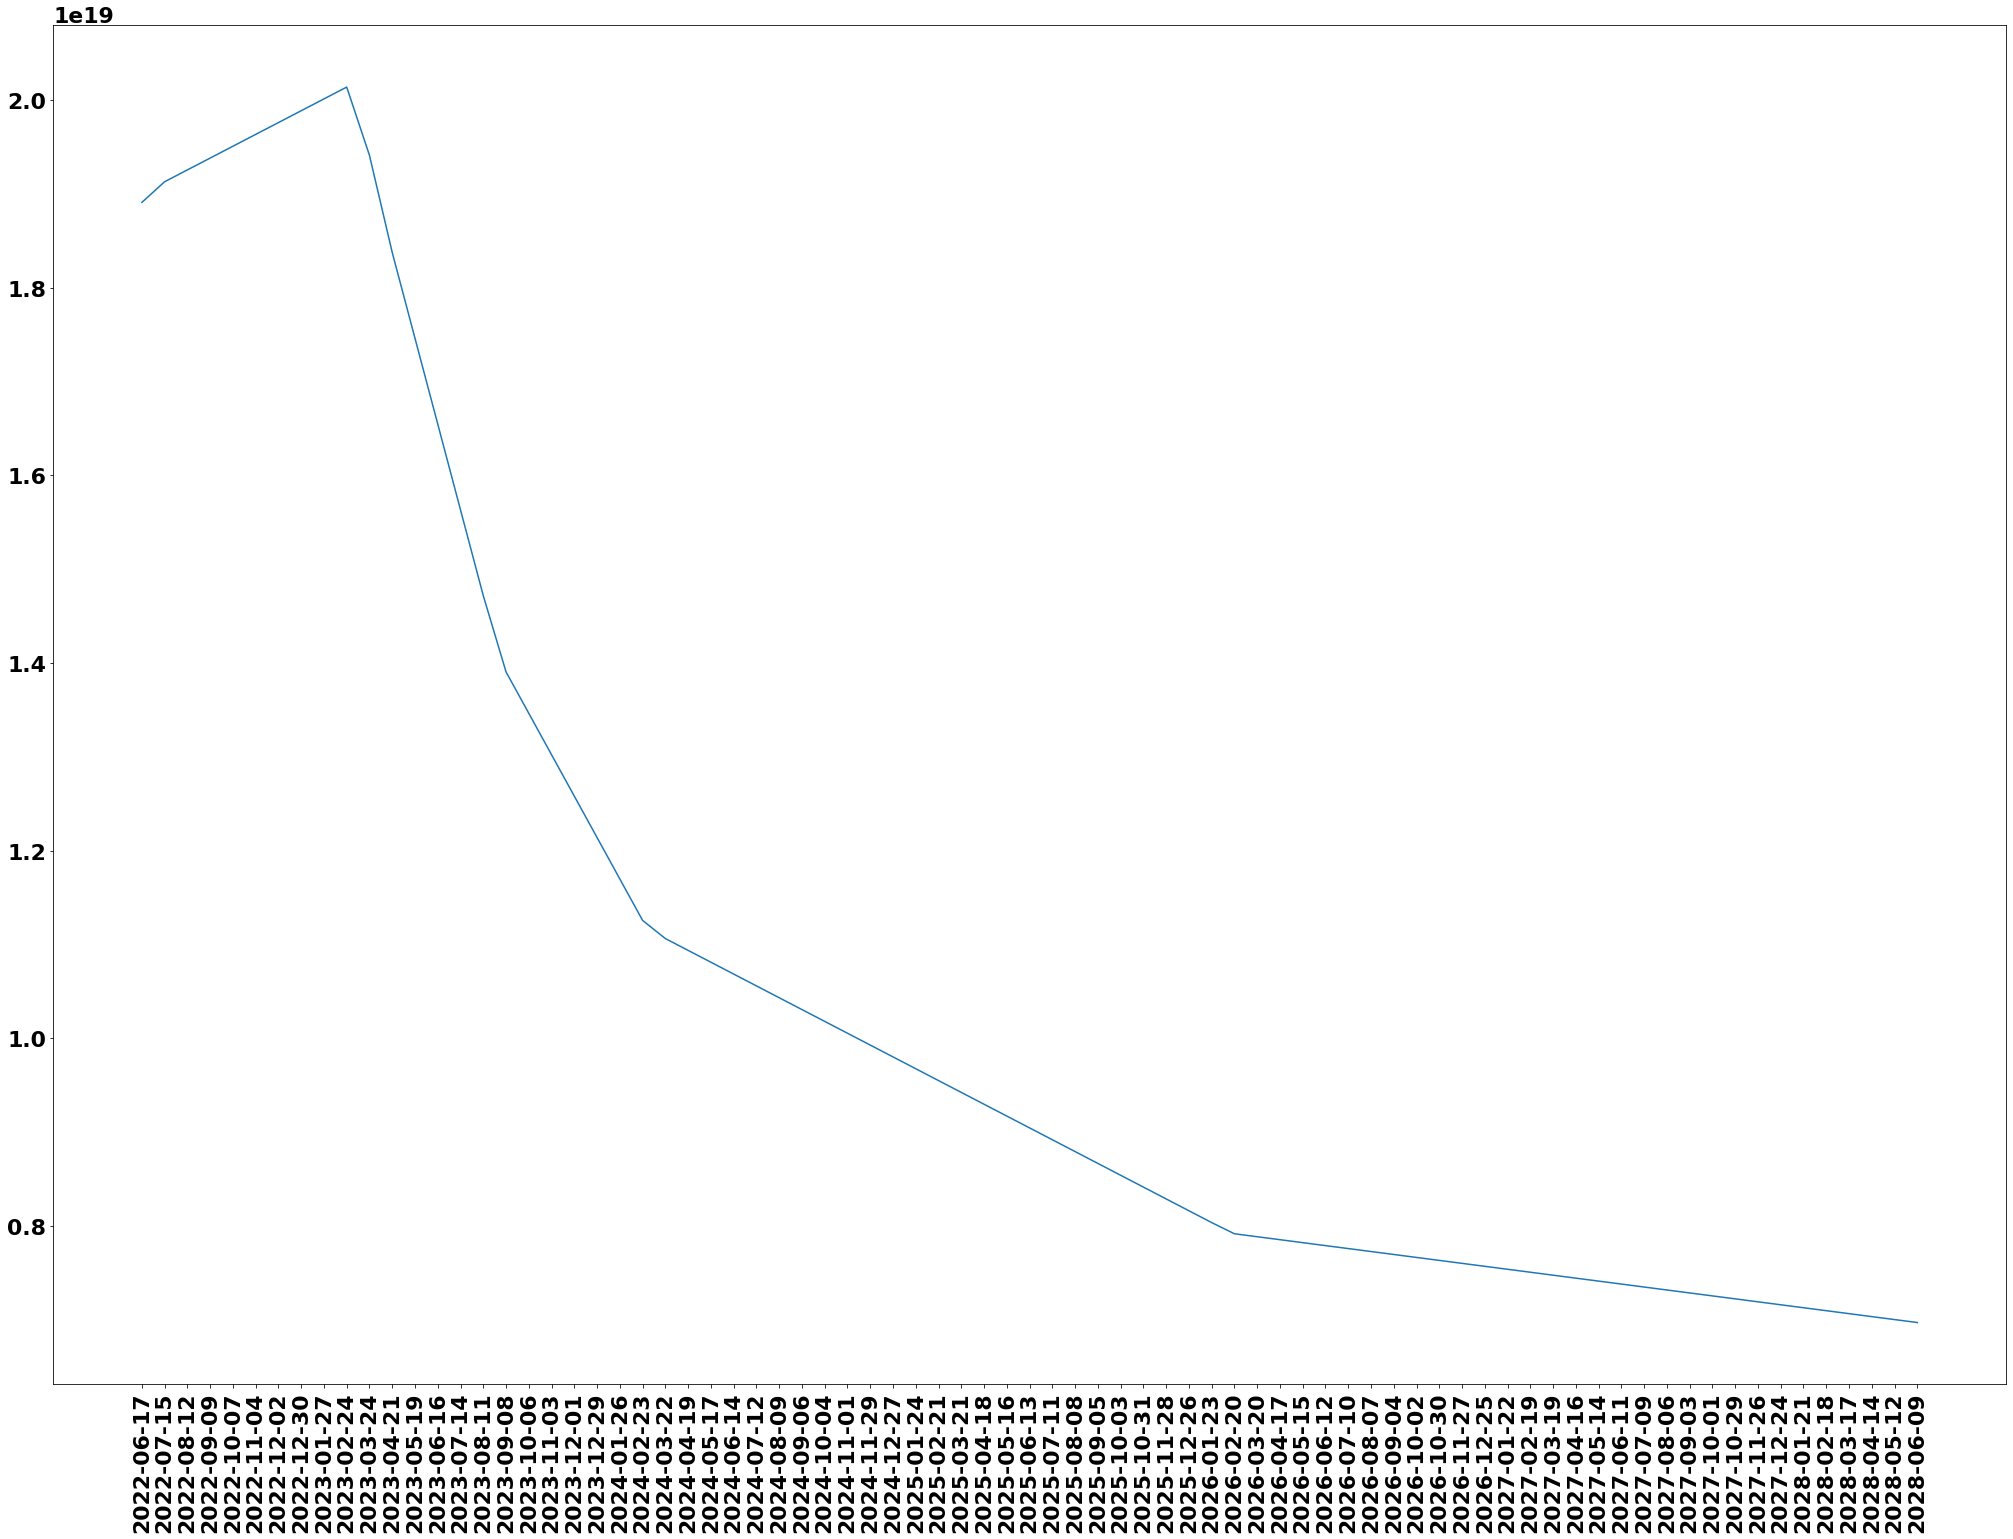

In [22]:
# plot rb trend in next 6 years
a = []
b = []
for epoch in tqdm(range(START_EPOCH+10, START_EPOCH+6*epochsInYear, 28*2880)):
    a.append(get_date_by_epoch(epoch))
    b.append(get_rb_power(epoch))
import matplotlib.pyplot as plt
plt.plot(a, b)
plt.xticks(rotation = 90)
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:06<00:00, 13.07it/s]


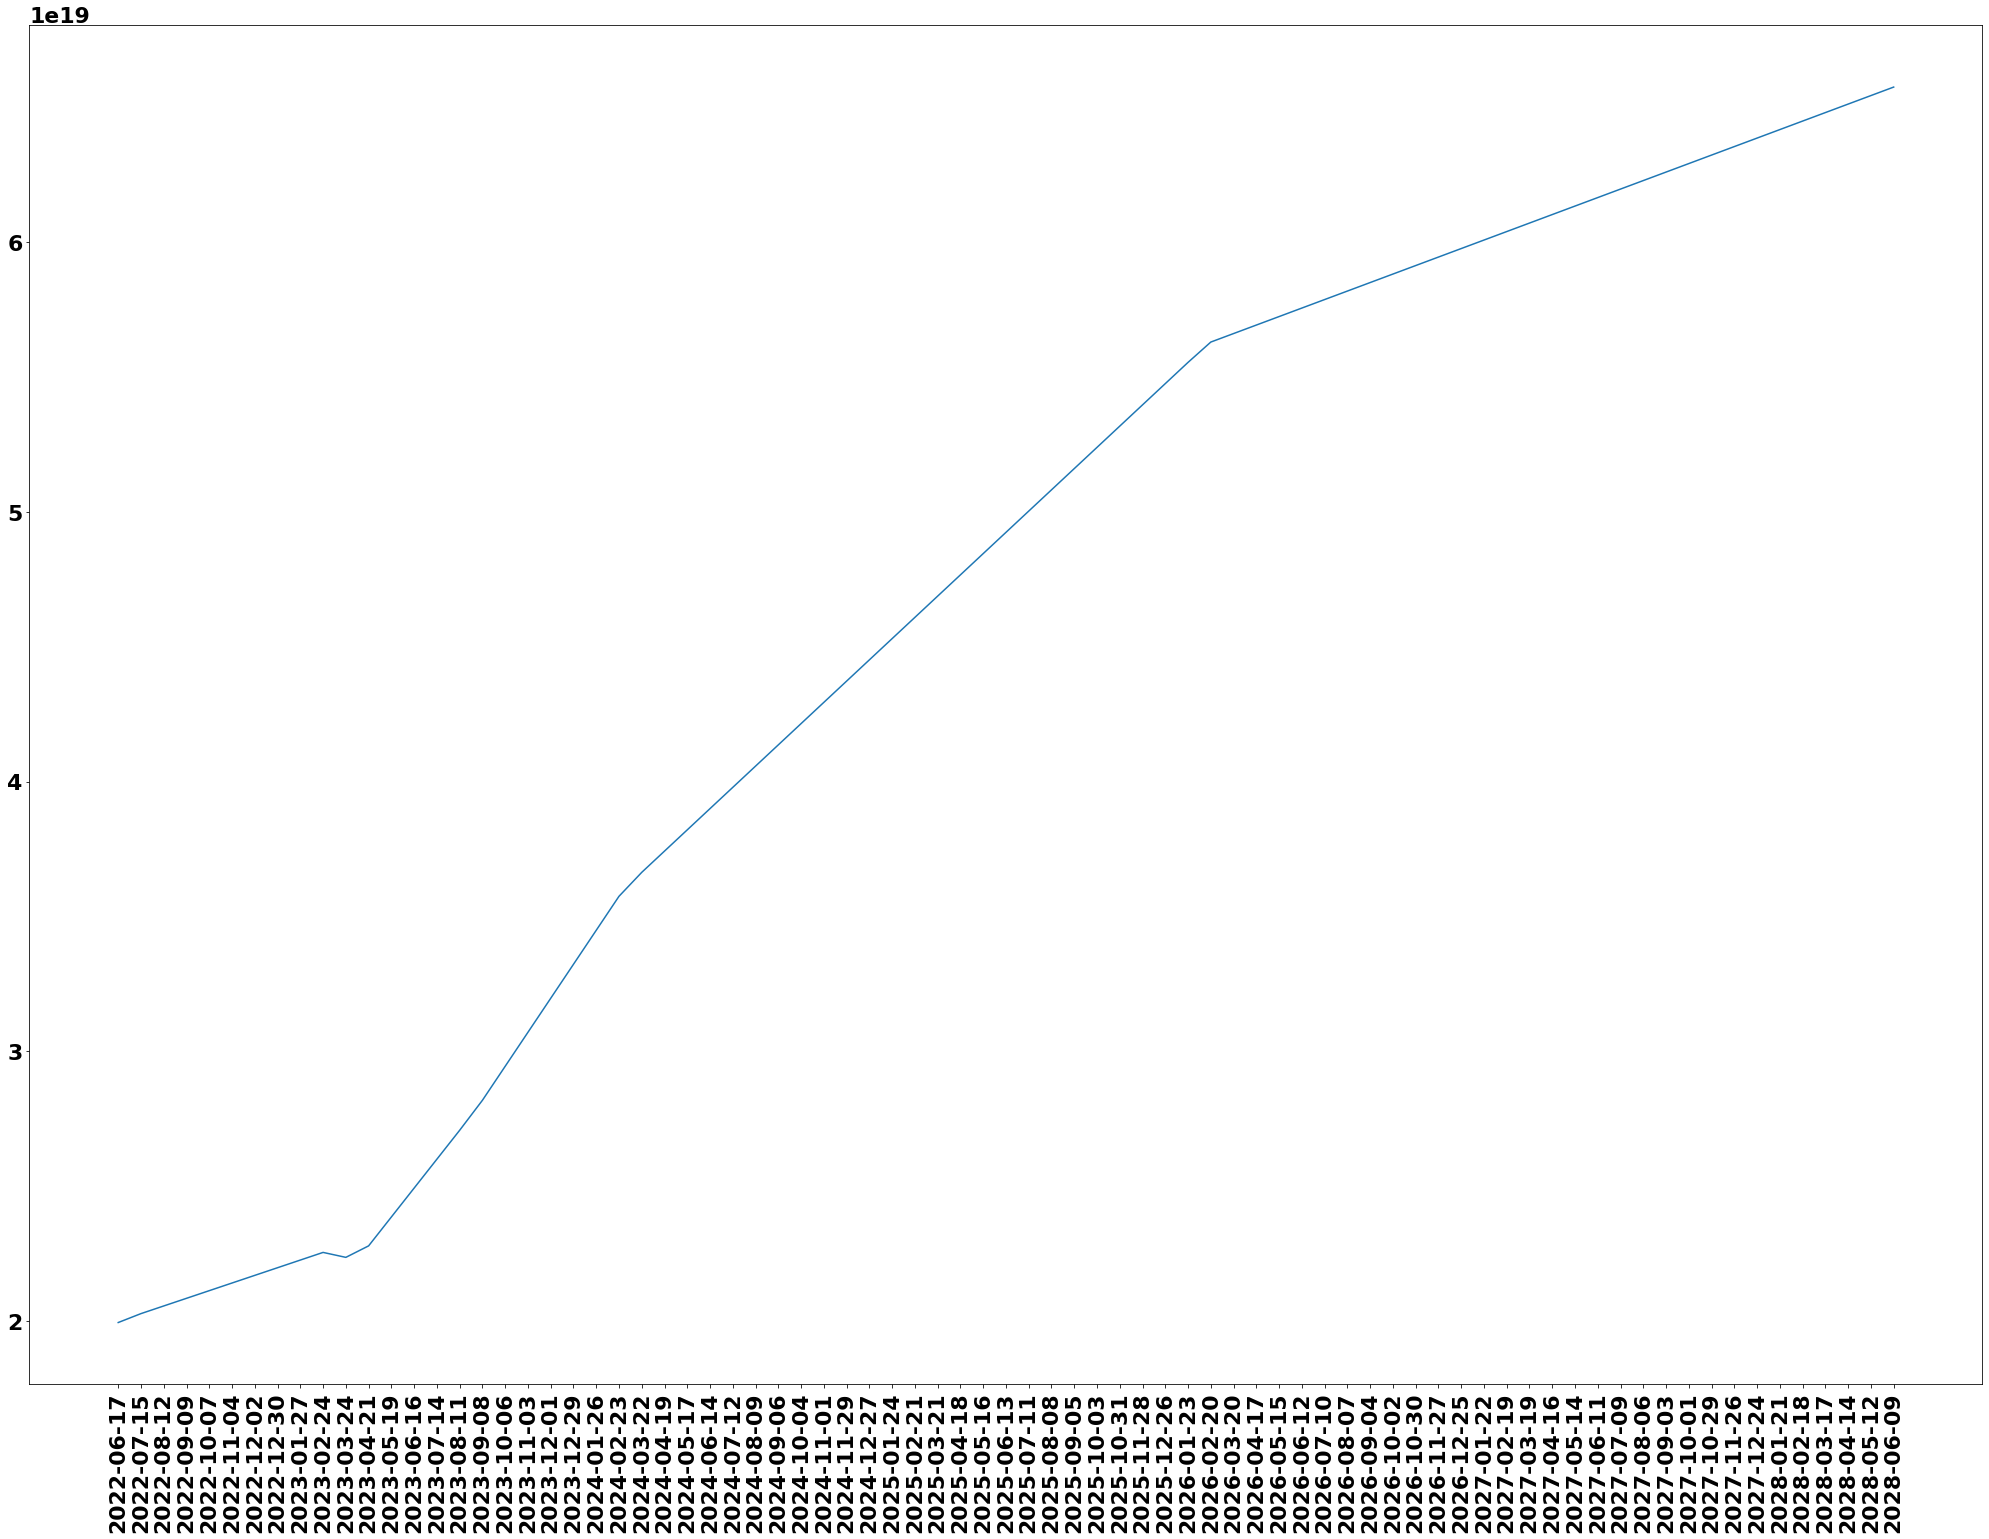

In [23]:
# plot qap trend in next 6 years

a = []
b = []
for epoch in tqdm(range(START_EPOCH+10, START_EPOCH+6*epochsInYear, 28*2880)):
    a.append(get_date_by_epoch(epoch))
    b.append(get_qap(epoch))
import matplotlib.pyplot as plt
plt.plot(a, b)
plt.xticks(rotation = 90)
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [01:51<00:00,  1.41s/it]


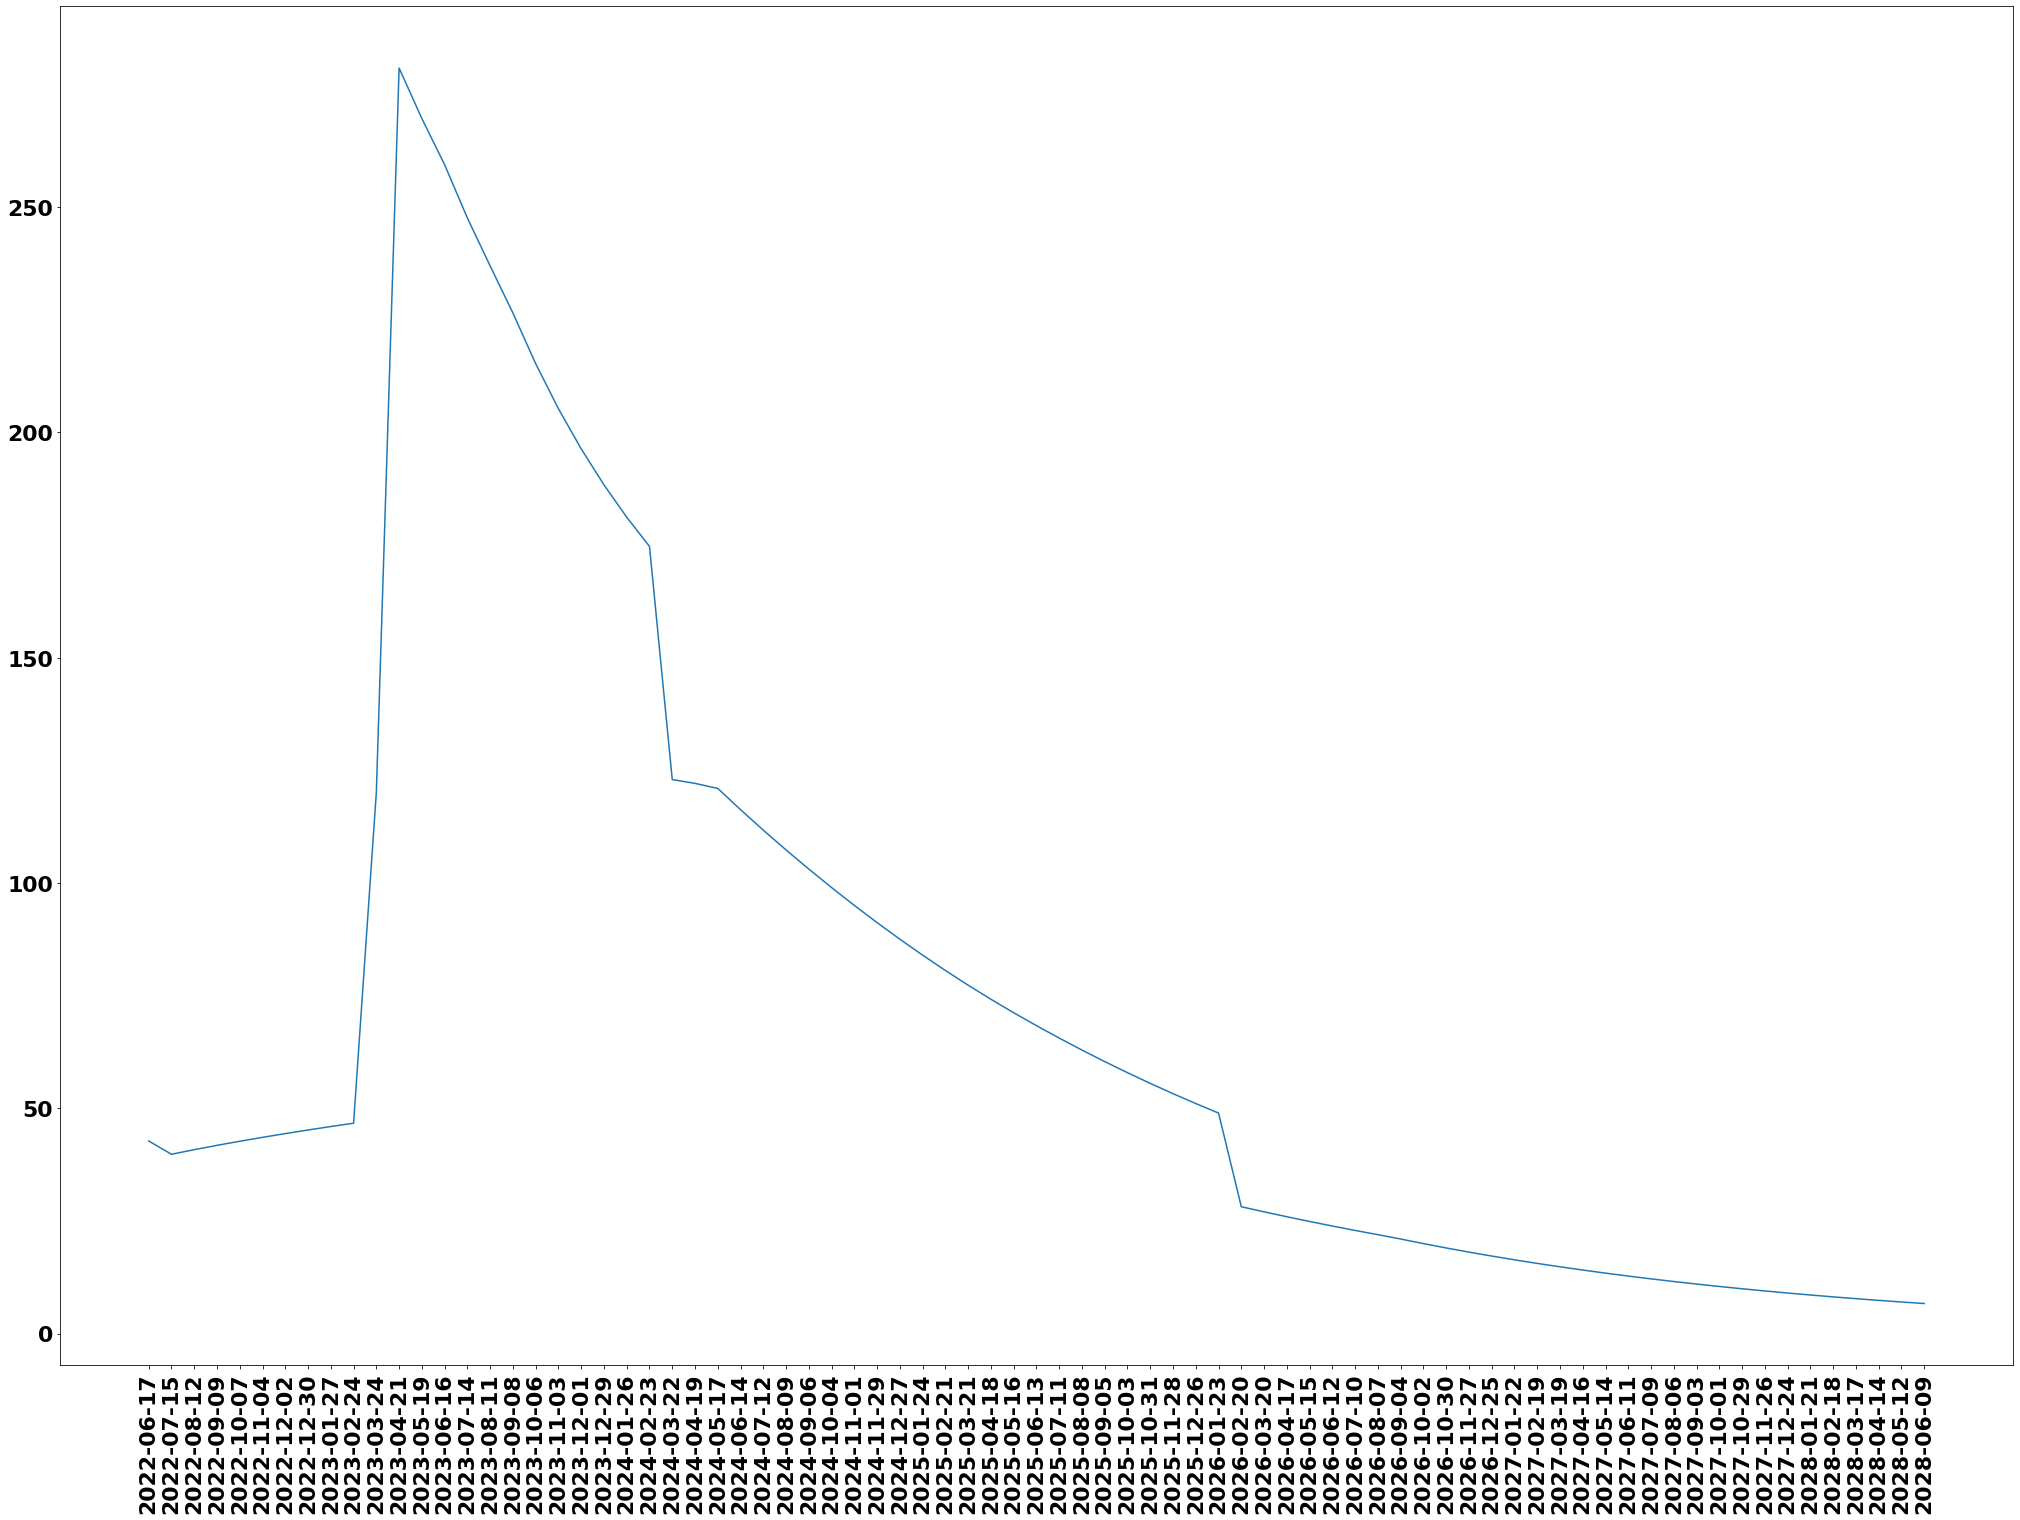

In [24]:
# plot pledge trend in next 6 years

a = []
b = []
for epoch in tqdm(range(START_EPOCH+10, START_EPOCH+6*epochsInYear, 28*2880)):
    a.append(get_date_by_epoch(epoch))
    b.append(get_pledge(epoch))
import matplotlib.pyplot as plt
plt.plot(a, b)
plt.xticks(rotation = 90)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 50068.00it/s]


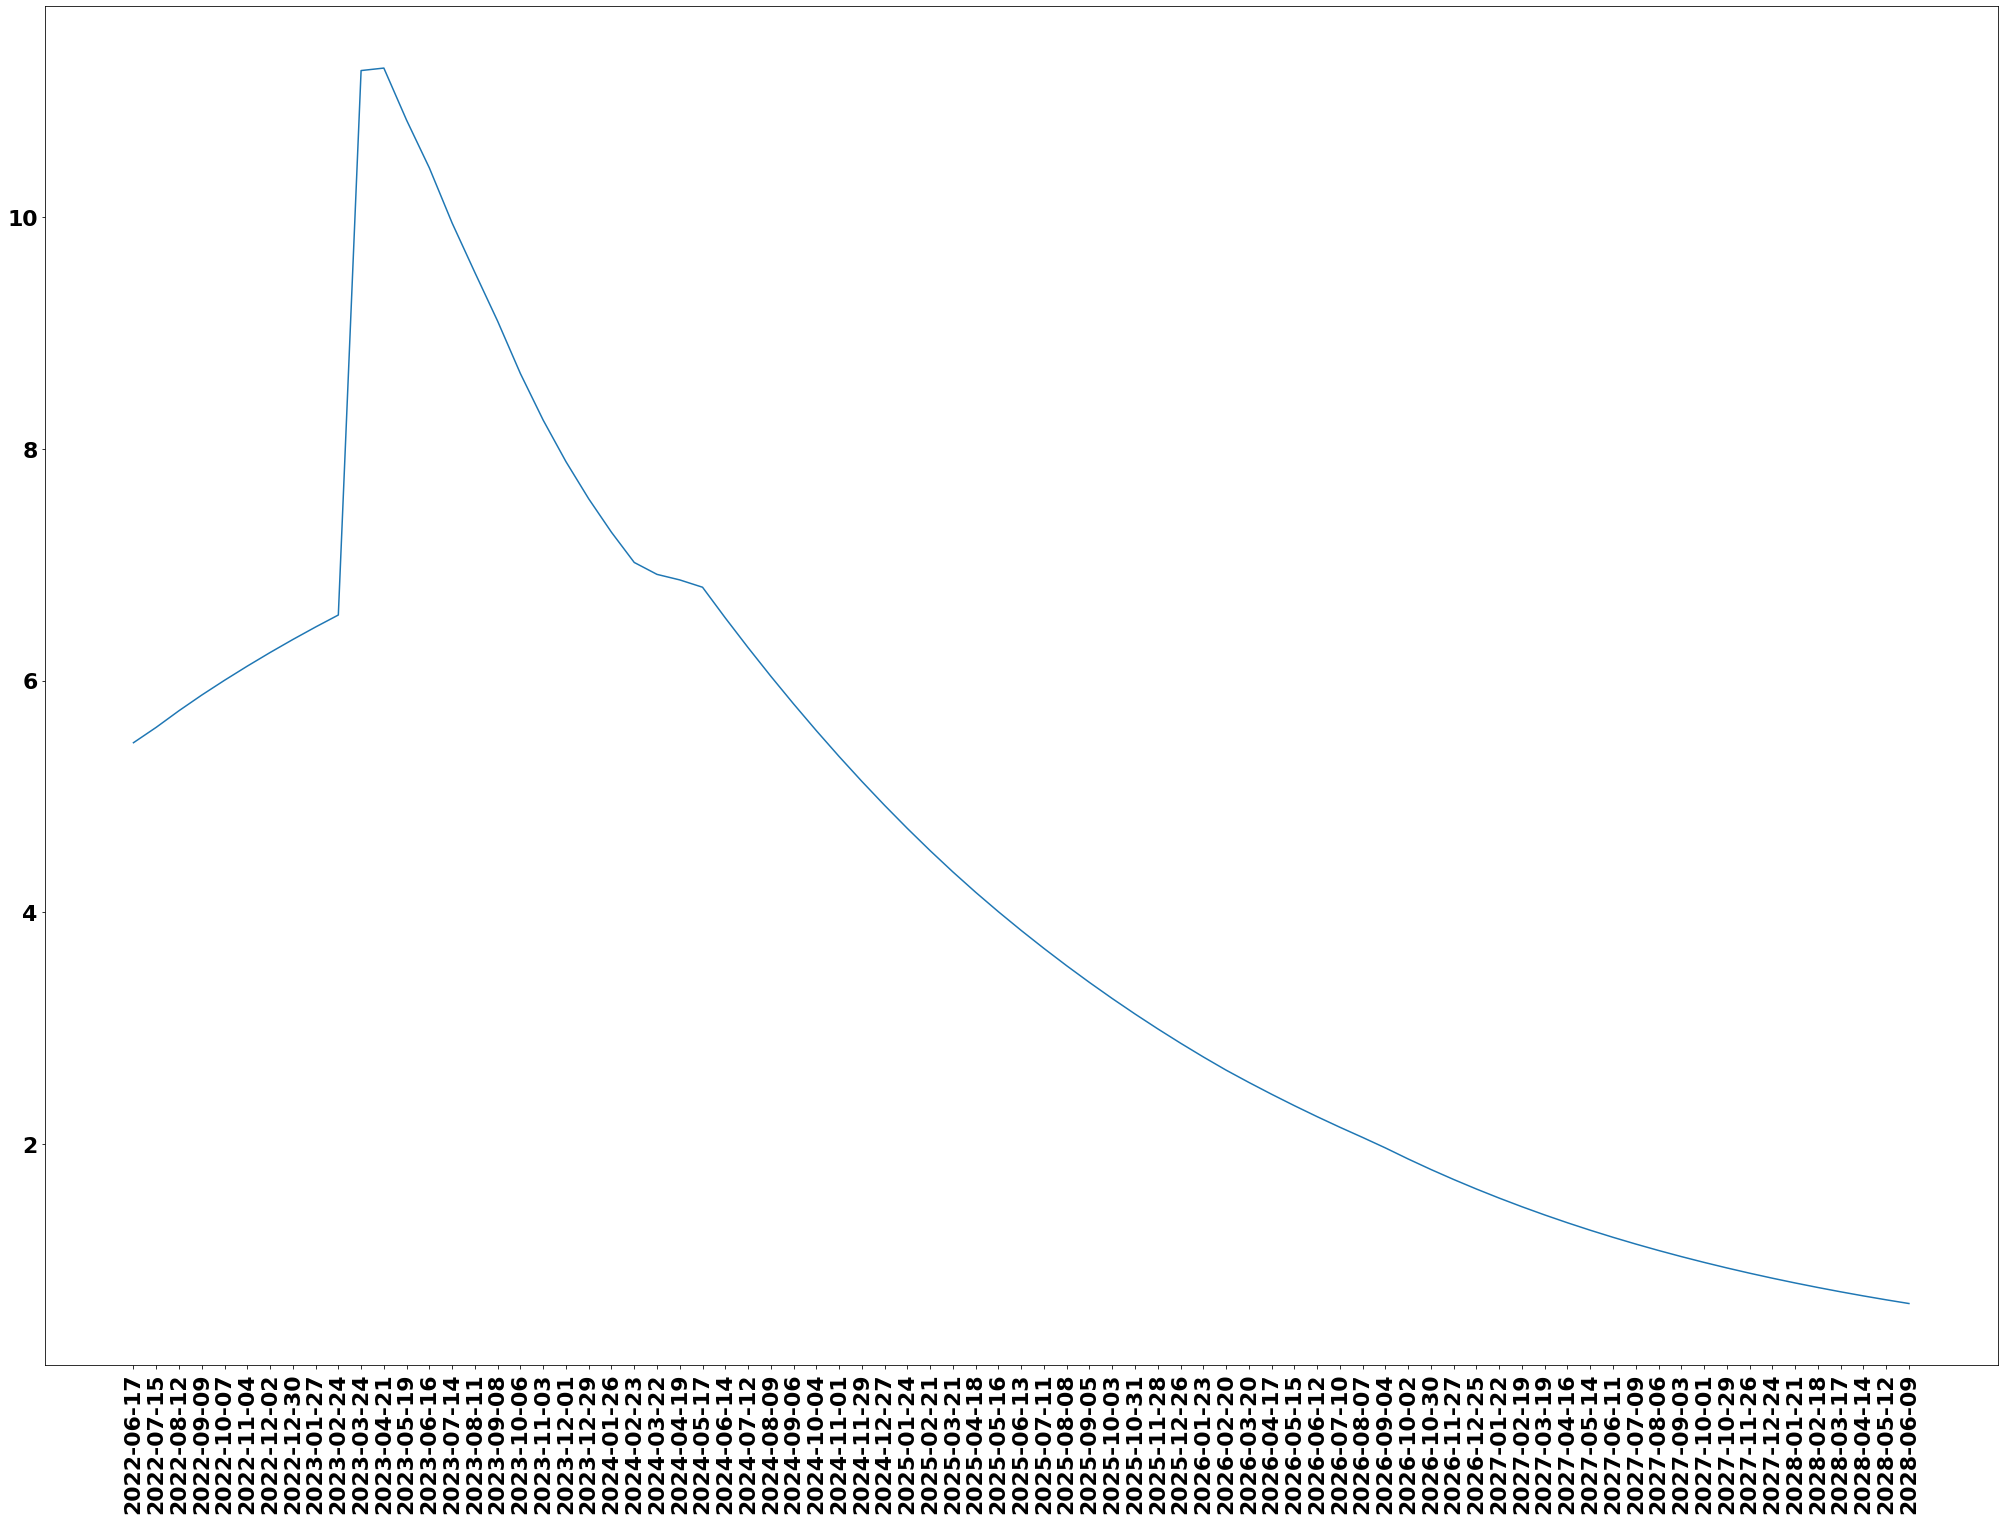

In [25]:
# plot initial pledge per Tib trend in next 6 years

a = []
b = []
for epoch in tqdm(range(START_EPOCH+10, START_EPOCH+6*epochsInYear, 28*2880)):
    a.append(get_date_by_epoch(epoch))
    b.append(get_pledge_per_TiB(epoch))
import matplotlib.pyplot as plt
plt.plot(a, b)
plt.xticks(rotation = 90)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 54257.41it/s]


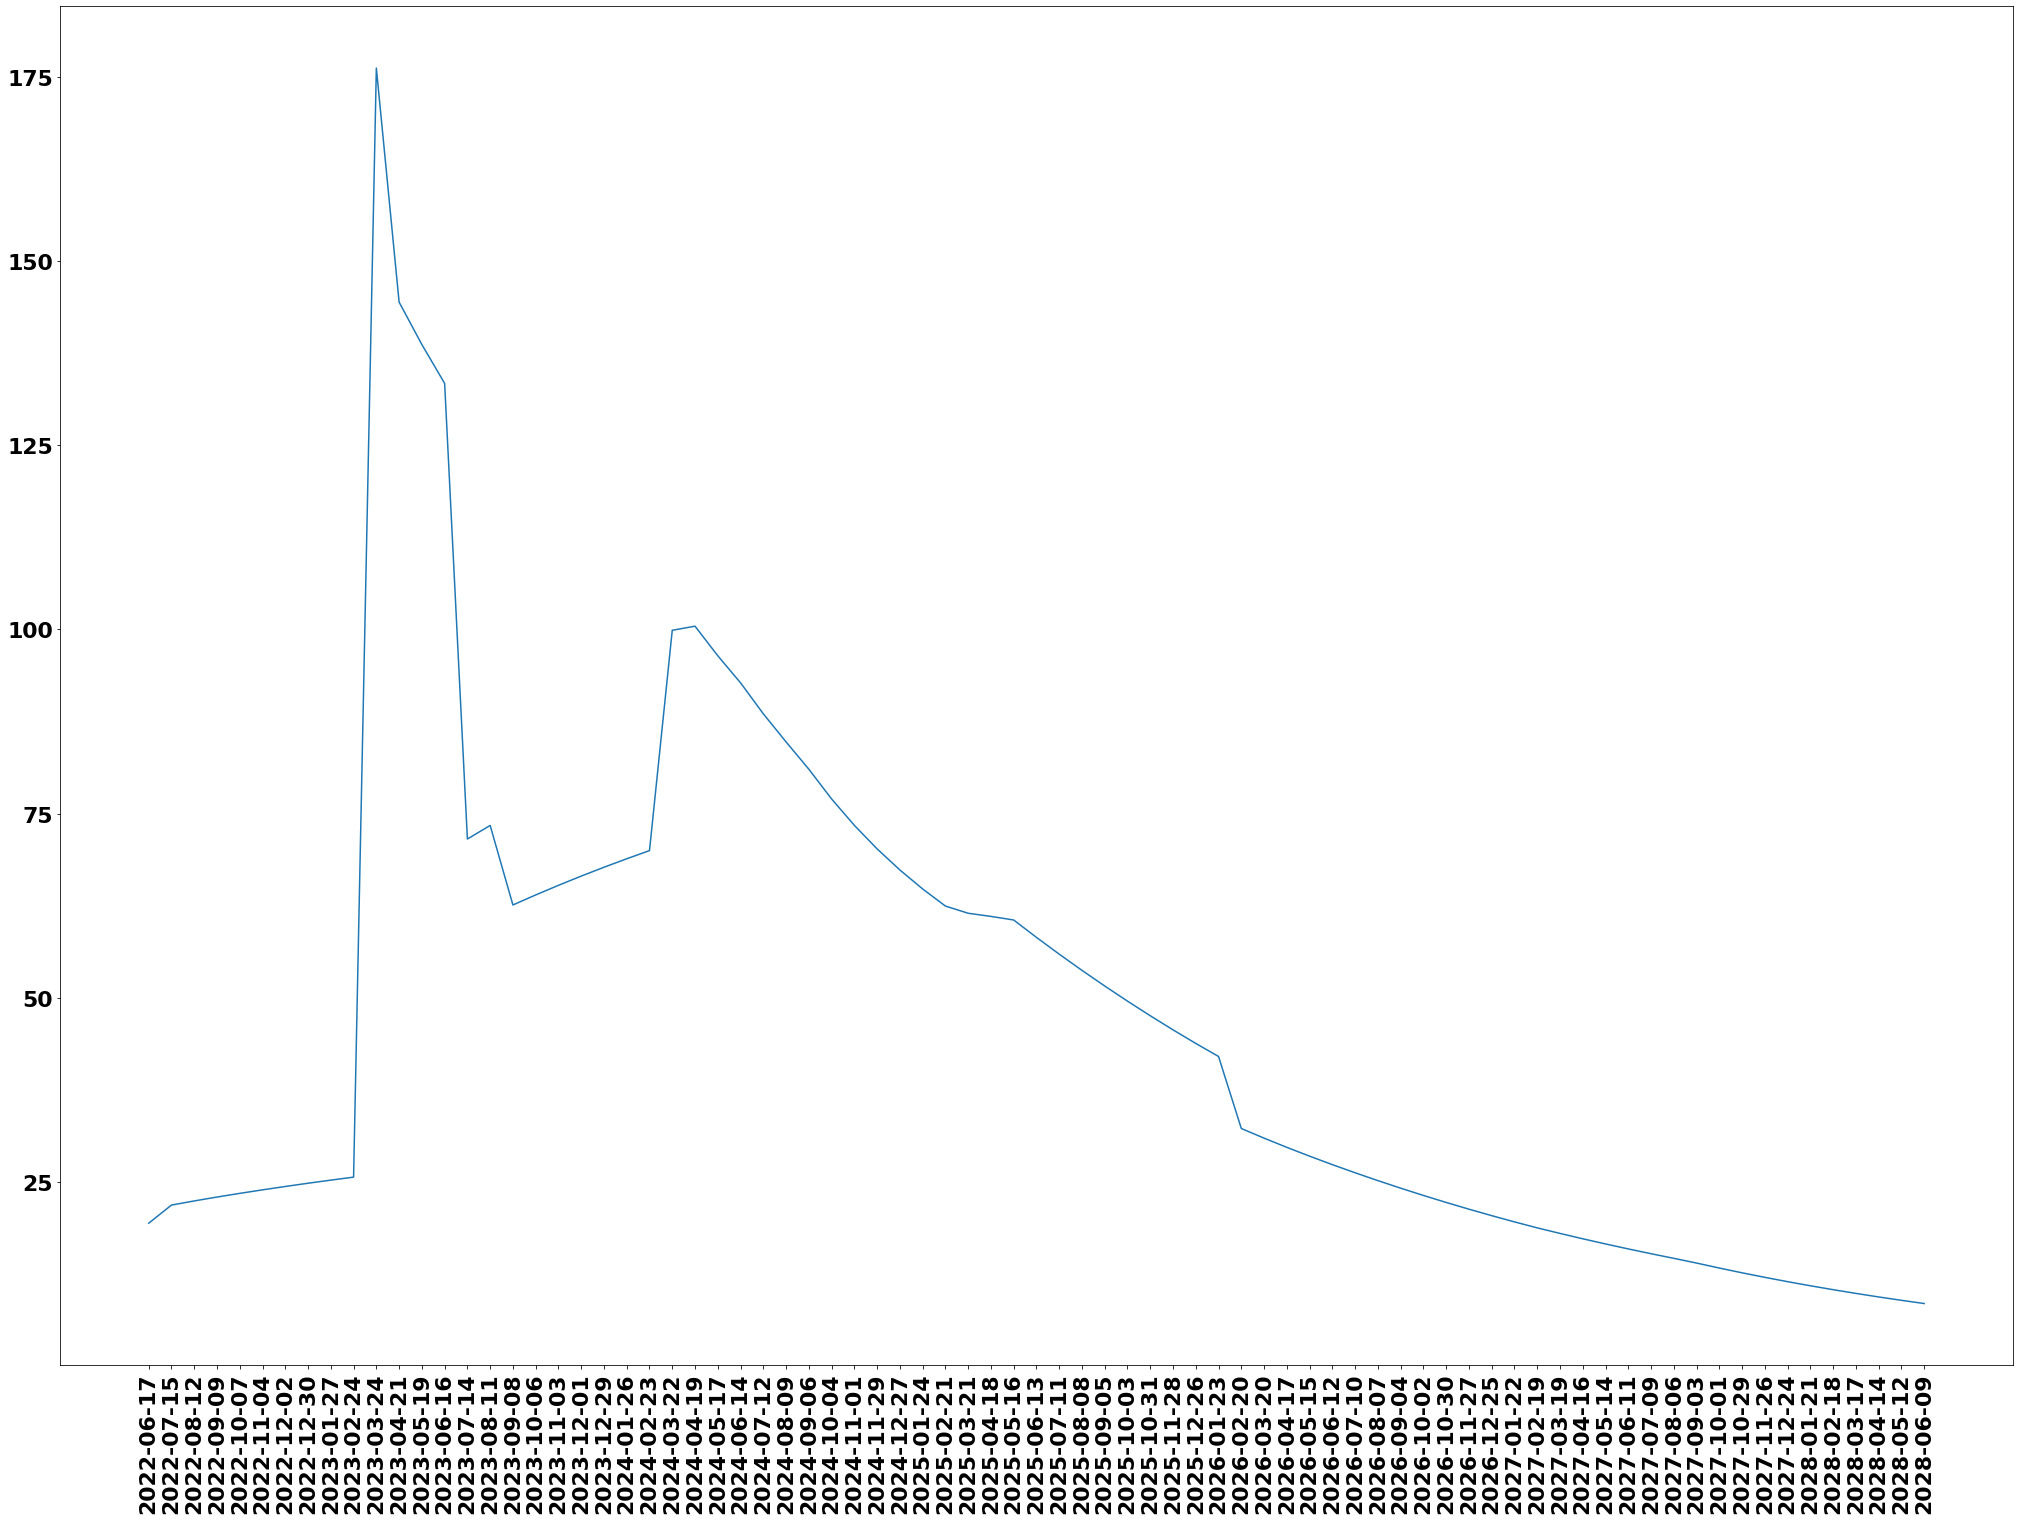

In [26]:
# plot exp pledge trend in next 6 years

a = []
b = []
for epoch in tqdm(range(START_EPOCH+10, START_EPOCH+6*epochsInYear, 28*2880)):
    a.append(get_date_by_epoch(epoch))
    b.append(get_expire_pledge(epoch))
import matplotlib.pyplot as plt
plt.plot(a, b)
plt.xticks(rotation = 90)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 73016.75it/s]


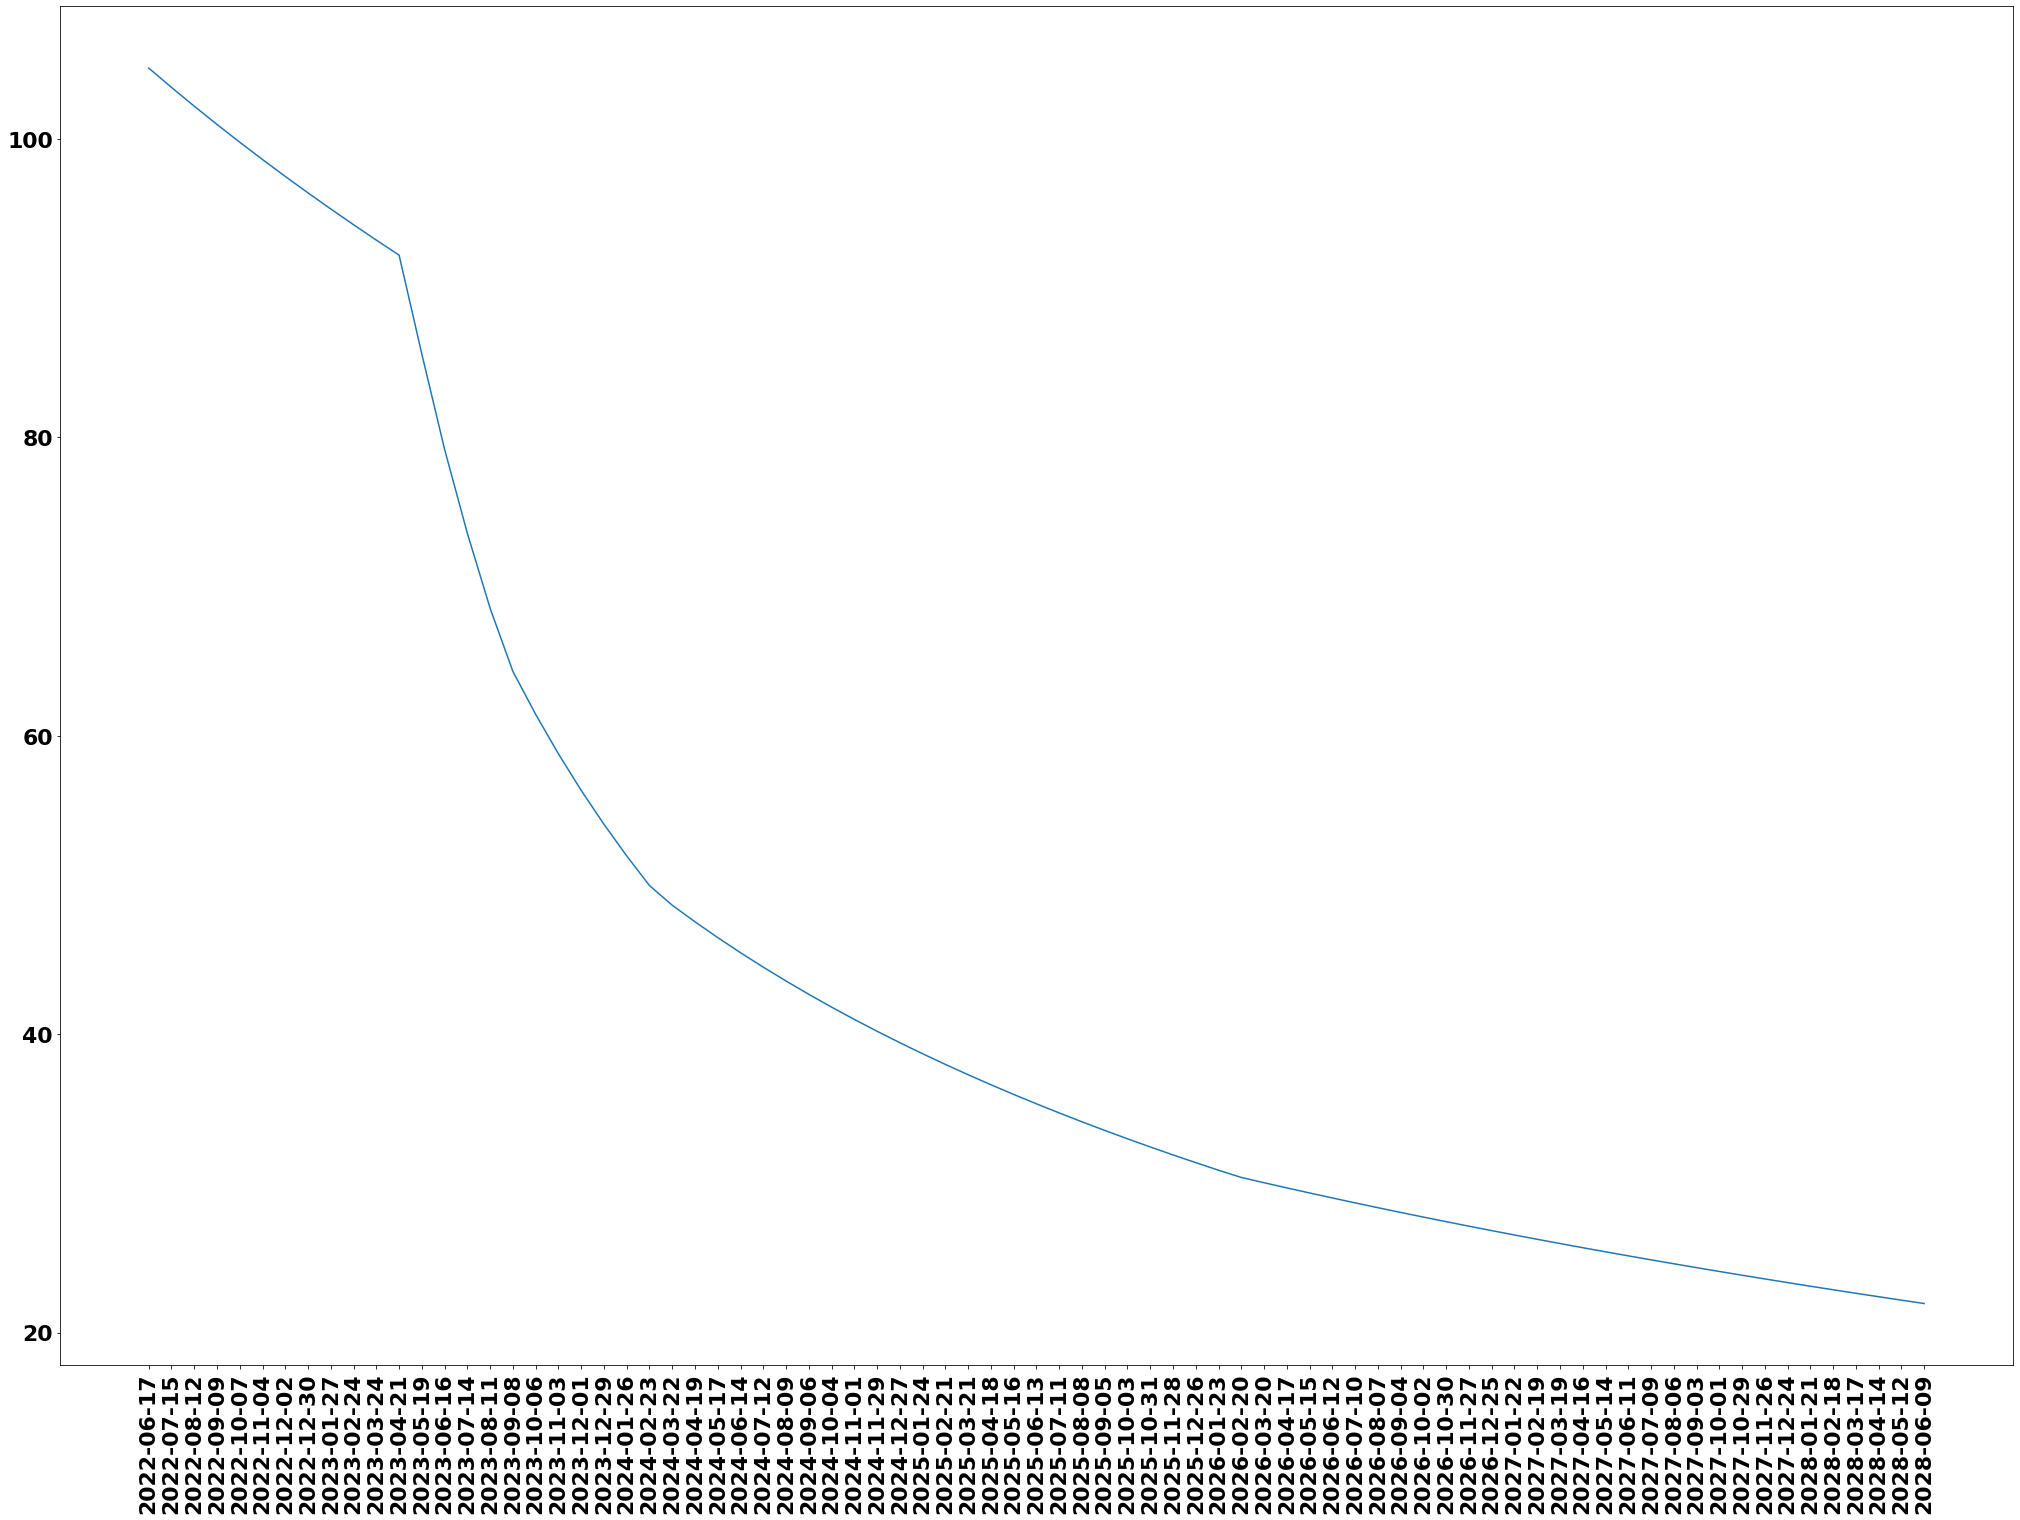

In [27]:
# plot reward trend in next 6 years

a = []
b = []
for epoch in tqdm(range(START_EPOCH+10, START_EPOCH+6*epochsInYear, 28*2880)):
    a.append(get_date_by_epoch(epoch))
    b.append(block_reward(epoch))
import matplotlib.pyplot as plt
plt.plot(a, b)
plt.xticks(rotation = 90)
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 298244.84it/s]


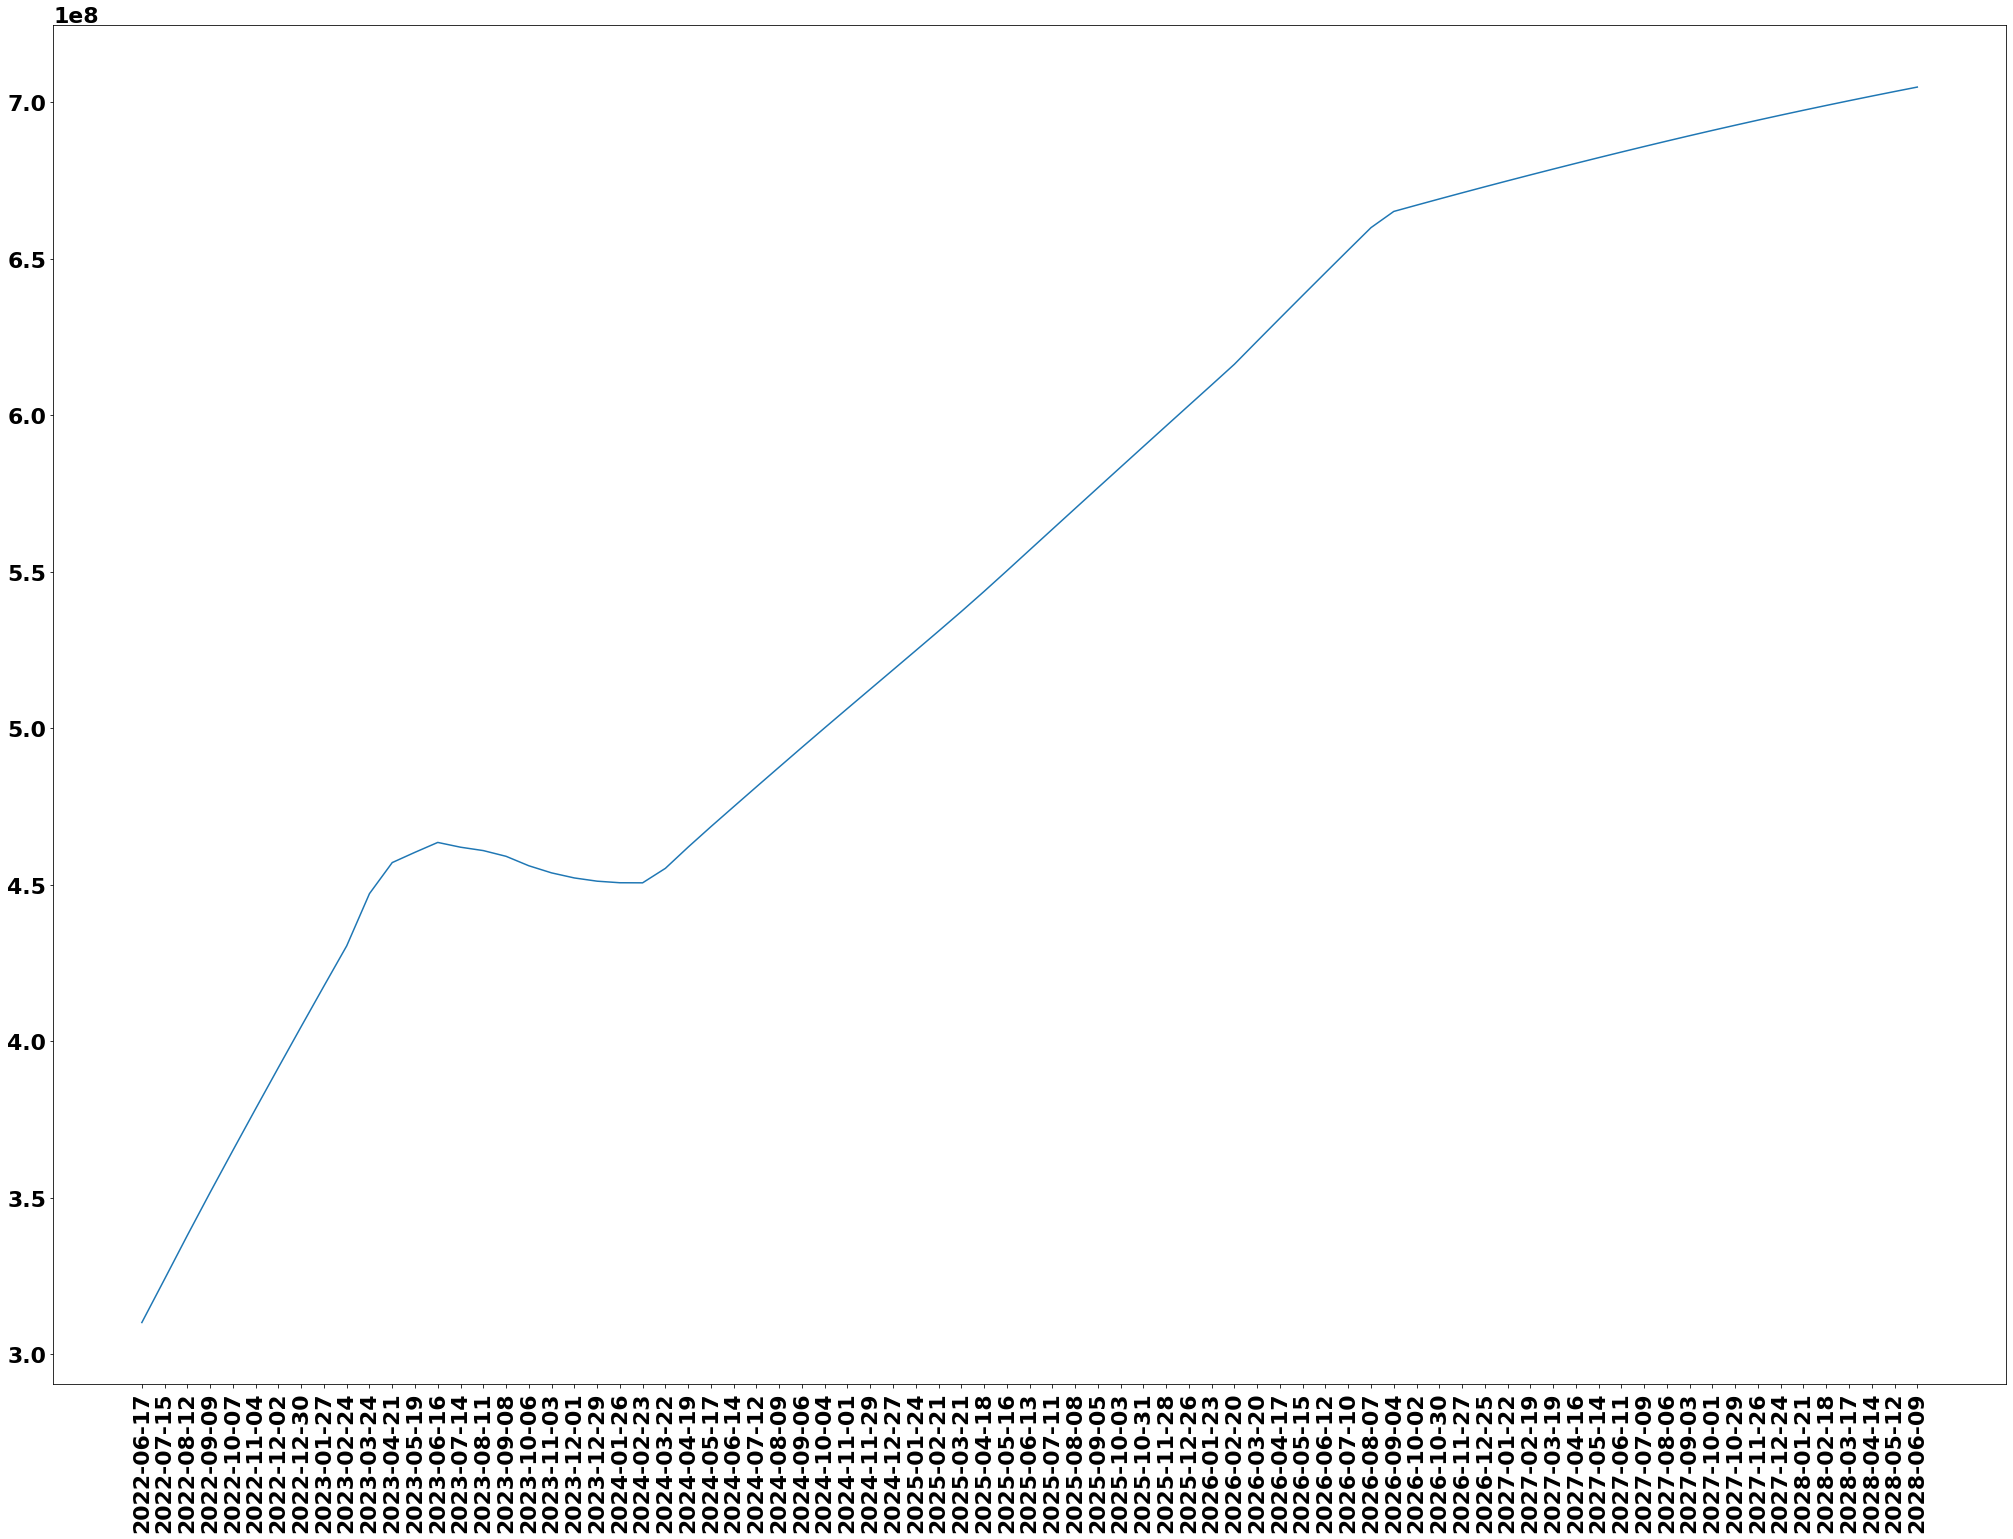

In [28]:
# plot circulation trend in next 6 years

a = []
b = []
for epoch in tqdm(range(START_EPOCH+10, START_EPOCH+6*epochsInYear, 28*2880)):
    a.append(get_date_by_epoch(epoch))
    b.append(get_circulation(epoch))
import matplotlib.pyplot as plt
plt.plot(a, b)
plt.xticks(rotation = 90)
plt.show()

In [29]:
rois = []
start_dates = []
start_epochs = []

rbp_cross_x = 0
rbp_cross_y = 0
rbp_crossed = 0

qap_cross_x = 0
qap_cross_y = 0
qap_crossed = 0

for epoch in tqdm(range(START_EPOCH+10, START_EPOCH+5*epochsInYear, 14*2880)):
    start_epochs.append(epoch)
    start_dates.append(get_date_by_epoch(epoch))
    cost = get_pledge_by_power(epoch)
    reward_epoch = epoch
    reward=0
    for reward_epoch in range(epoch, epoch+SECTOR_LIFE):
        epoch_reward = block_reward_by_power(reward_epoch)
        reward += epoch_reward
        if epoch_reward < 0:
            print("reward_epoch: "+str(reward_epoch)+" epoch_reward: "+str(epoch_reward))
        
    rois.append(reward/cost)
    
    if not rbp_crossed and get_baseline_power(epoch) > get_rb_power(epoch):
        rbp_cross_x = get_date_by_epoch(epoch)
        rbp_cross_y = reward/cost
        rbp_crossed = 1
        
    if not qap_crossed and get_baseline_power(epoch) > get_qap(epoch):
        qap_cross_x = get_date_by_epoch(epoch)
        qap_cross_y = reward/cost
        qap_crossed = 1
    
    #print("epoch: "+str(epoch)+" cost: "+str(cost)+" reward: "+str(reward))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 131/131 [10:30<00:00,  4.81s/it]


In [30]:
turning_points_x=[]
turning_points_y=[]
for turning_point in TURNING_POINTS:
    x, idx = closest_value(start_epochs, turning_point)
    x = start_dates[idx]
    y = rois[idx]
    turning_points_x.append(x)
    turning_points_y.append(y)

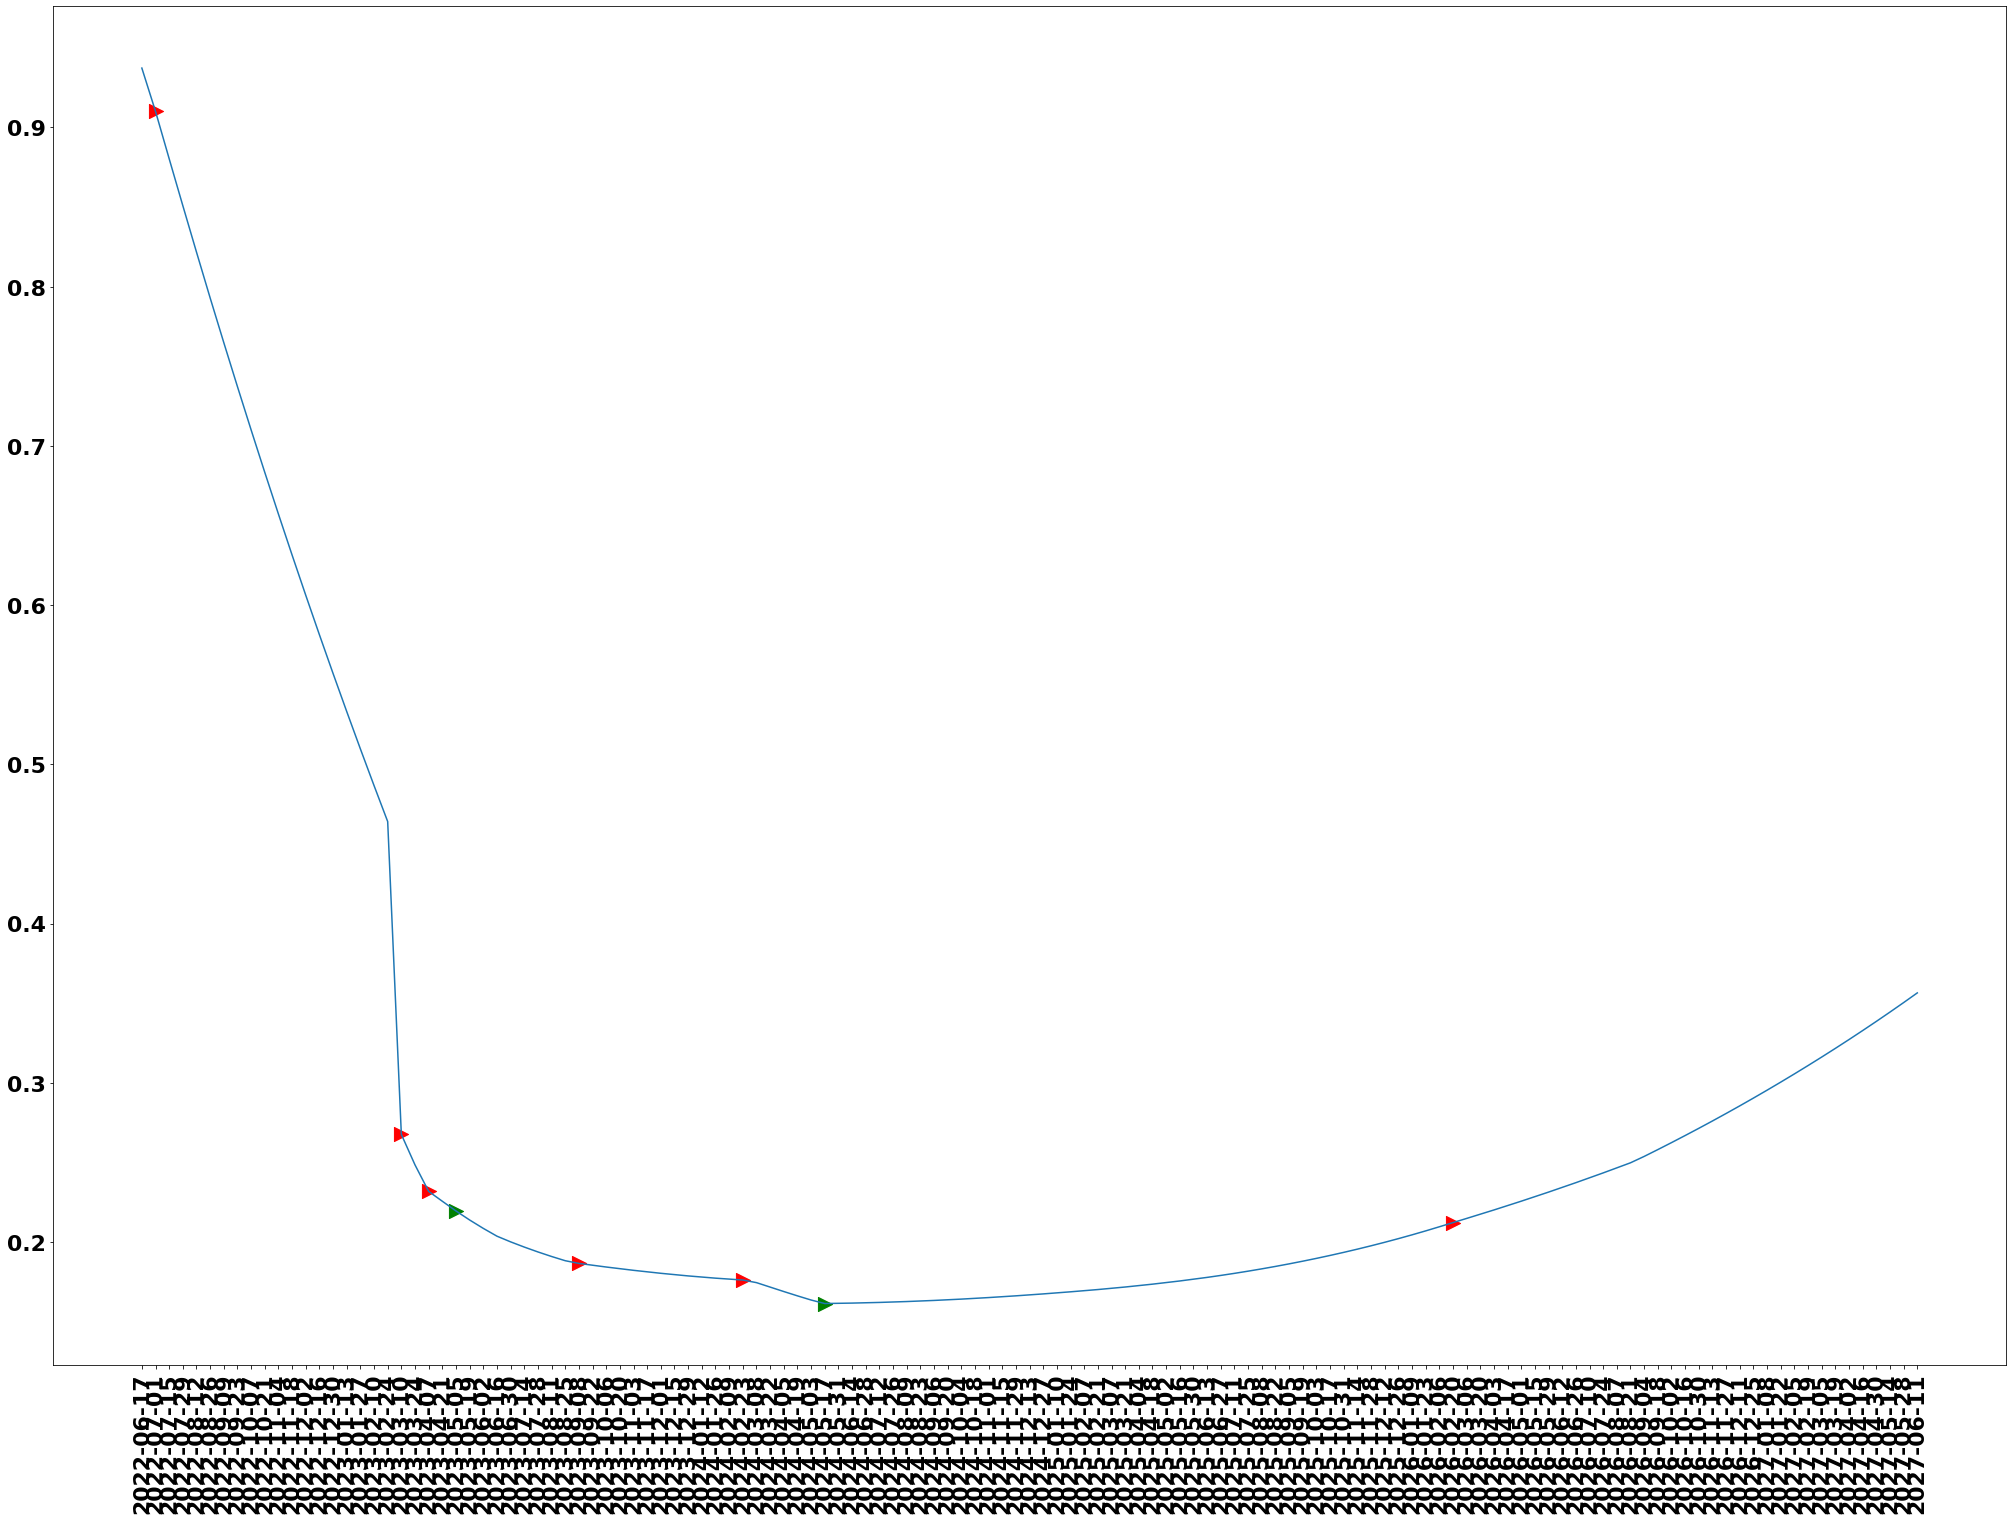

In [31]:
plt.plot(start_dates, rois)
plt.scatter(turning_points_x, turning_points_y, s=200, marker='>', c='red')
plt.scatter([rbp_cross_x, qap_cross_x], [rbp_cross_y, qap_cross_y], s=200, marker='>', c='green')


plt.xticks(rotation = 90)
plt.show()